#Week 9 Assignment - Using LSTM/RNN to Predict Disaster Tweets

# INGRESS

In [8]:
import datetime, os

import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt 
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn import preprocessing

import tensorflow as tf

In [2]:
# get training data
from google.colab import files
upload = files.upload()

Saving train.csv to train.csv


In [3]:
# convert inputted data into dataframe
origDF = pd.read_csv('train.csv')

#EDA

In [4]:
# inspect data structure
origDF.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [5]:
# remove unnecessary columns
trainDF = origDF.drop(["id","keyword","location"], axis=1)
trainDF.head()

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1


In [6]:
# encode the disaster labels
labelEncoder = preprocessing.LabelEncoder()
trainDF['target'] = labelEncoder.fit_transform(trainDF['target'])

In [7]:
# store the messages and disaster labels in separate lists
trainingMessages = []
trainingLabels = []

for index, item in trainDF.iterrows():
  message, label = item["text"], item["target"]
  trainingMessages.append(str(message))
  trainingLabels.append(label)

In [9]:
# set parameters
VOCAB_SIZE = 23196
EMBEDDING_DIM = 32
MAX_LENGTH = 100
TRUNC_TYPE = 'post'
PADDING_TYPE='post'
OOV_TOK = "<OOV>"

In [12]:
# convert words to integer tokens and count frequencies of the words
tokenizer = Tokenizer(num_words = VOCAB_SIZE, oov_token = OOV_TOK)
tokenizer.fit_on_texts(trainingMessages)
wordIndex = tokenizer.word_index
print('The length of the word index is:', len(wordIndex))

The length of the word index is: 22701


In [13]:
# convert word sequences to sequences of integers and add padding
trainingMessages = tokenizer.texts_to_sequences(trainingMessages)

trainingPadded = pad_sequences(trainingMessages,
                                maxlen = MAX_LENGTH, 
                                truncating = TRUNC_TYPE, 
                                padding = PADDING_TYPE
                               )

In [14]:
# convert to Numpy arrays
trainingPadded = np.array(trainingPadded)
trainingLabels_final = np.array(trainingLabels)

#MODELING

In [15]:
# create the Keras LSTM model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(VOCAB_SIZE, EMBEDDING_DIM, input_length=MAX_LENGTH),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(12)),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model.compile(
    loss='binary_crossentropy',
    optimizer='Adamax',
    metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 32)           742272    
                                                                 
 bidirectional (Bidirectiona  (None, 24)               4320      
 l)                                                              
                                                                 
 dense (Dense)               (None, 1)                 25        
                                                                 
Total params: 746,617
Trainable params: 746,617
Non-trainable params: 0
_________________________________________________________________


In [16]:
history = model.fit(
    trainingPadded, 
    trainingLabels_final, 
    epochs = 35, 
    batch_size = 128,  
    validation_split=0.2
)

Epoch 1/35
48/48 [==============================] - 8s 92ms/step - loss: 0.6798 - accuracy: 0.5783 - precision: 0.4000 - recall: 0.0047 - val_loss: 0.6850 - val_accuracy: 0.5345 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/35
48/48 [==============================] - 3s 70ms/step - loss: 0.6586 - accuracy: 0.5795 - precision: 1.0000 - recall: 3.9032e-04 - val_loss: 0.6618 - val_accuracy: 0.5345 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/35
48/48 [==============================] - 3s 70ms/step - loss: 0.6183 - accuracy: 0.6450 - precision: 0.9115 - recall: 0.1729 - val_loss: 0.6166 - val_accuracy: 0.6835 - val_precision: 0.8771 - val_recall: 0.3724
Epoch 4/35
48/48 [==============================] - 3s 71ms/step - loss: 0.5693 - accuracy: 0.7417 - precision: 0.7966 - recall: 0.5183 - val_loss: 0.5793 - val_accuracy: 0.7308 - val_precision: 0.7926 - val_recall: 0.5712
Epoch 5/35
48/48 [==============================] - 4s 85ms/step - loss: 0.5256 - accura

**Evaluate performance of the model**

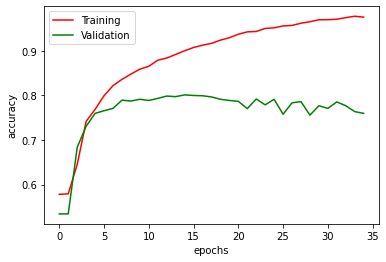

In [17]:
plt.plot(history.history["accuracy"], color="r")
plt.plot(history.history["val_accuracy"], color="g")
plt.legend(["Training", "Validation"])
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.show()

============================================================================================

**Apply the model to the Kaggle.com test dataset**

In [18]:
# get test dataset
from google.colab import files
upload = files.upload()

Saving test.csv to test.csv


In [27]:
# convert inputted data into dataframe
origTestDF = pd.read_csv('test.csv')
origTestDF.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [28]:
# remove unneeded columns
testDF = origTestDF.drop(["id","keyword","location"], axis=1)
testDF.head()

,text
0,Just happened a terrible car crash
1,"Heard about #earthquake is different cities, s..."
2,"there is a forest fire at spot pond, geese are..."
3,Apocalypse lighting. #Spokane #wildfires
4,Typhoon Soudelor kills 28 in China and Taiwan


In [22]:
# put the text information into a Series
Xtest = testDF['text']
type(Xtest)

pandas.core.series.Series

In [23]:
# prep the data - convert word sequences to sequences of integers and add padding
testMessages = tokenizer.texts_to_sequences(Xtest)

testPadded = pad_sequences(testMessages,
                                maxlen=MAX_LENGTH, 
                                truncating=TRUNC_TYPE, 
                                padding=PADDING_TYPE
                               )
testPadded = np.array(testPadded)

In [24]:
# use model and prepared test data to make predictions
testPredict = model.predict(testPadded).round().astype(int)

In [29]:
kaggleDisasterDF = pd.DataFrame({'id':origTestDF['id'],'target':testPredict.ravel()})
kaggleDisasterDF.to_csv('KaggleDisaster.csv',index = False)

==============================================================================

#SUMMARY

This assignment provided an introduction to Natural Language Processing, including the conversion of word sequences to token sequences of integers, training an LSTM-RNN on phrases (word sequences) that possess a common theme (e.g., "disaster") and then using the trained LSTM-RNN to assess whether previously unseen phrases possess that common theme.

In addition to word sequences, there are many other types of information that is temporal in nature (e.g., stock prices, music, etc.), and this type of technology can be used to examine, analyze, classify, etc. other types of sequential/temporal information.  Therefore, this introduction to NLP provides a basis for further exploration in these areas, as well.

My Kaggle.com submission results are as follows:

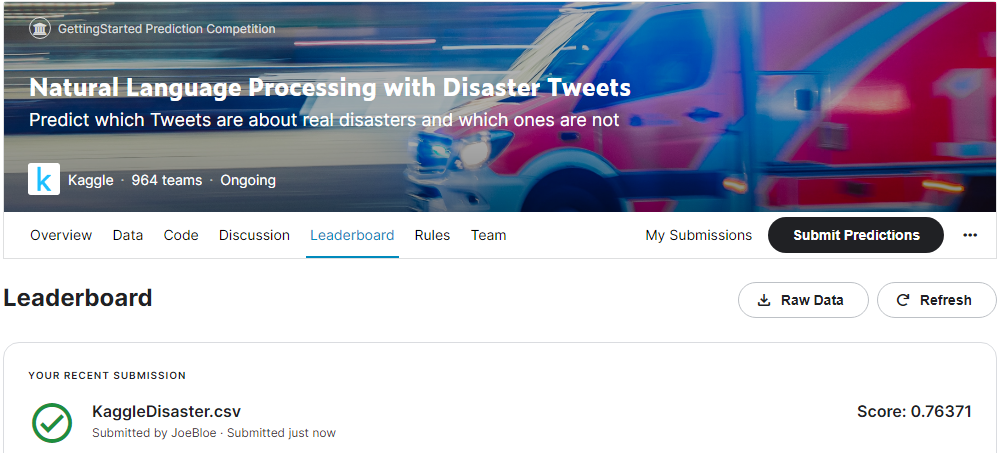